# Conjugate Gradient Method

## Ejemplo: 
$
\begin{array}{ccc}
3x_0 + 2x_1 & = &2 \\
2x_0 + 6x_1 & = &-8
\end{array} \Longrightarrow
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right]
\left[
\begin{array}{cccc}
x_{0} \\
x_{1}
\end{array} \right] 
=
\left[
\begin{array}{c}
2\\ -8
\end{array}
\right]
$

Las ecuaciones de las rectas se pueden escribir como:

$
\begin{array}{ccc}
\dfrac{3}{2}x_0 + x_1 & = & \dfrac{2}{2} \\
\dfrac{2}{6}x_0 + x_1 & = & -\dfrac{8}{6}
\end{array} \Longrightarrow
\begin{array}{ccc}
y_0 = m_0 x + b_0 \\
y_1 = m_1 x + b_1
\end{array} \text{ donde }
\begin{array}{ccc}
m_0 = -\dfrac{3}{2} & b_0 = 1 \\
m_1 = -\dfrac{2}{6} & b_1 = -\dfrac{8}{6}
\end{array}
$


Matriz A : 
 [[3 2]
 [2 6]]
Vector b : 
 [ 2 -8]
Solución del sistema:  [ 2. -2.]


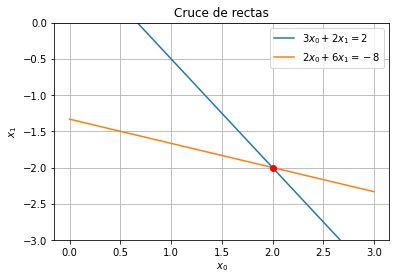

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m0 = -3/2
b0 = 1
m1 = -2/6
b1 = -8/6
x = np.linspace(0,3,10)
y0 = m0 * x + b0
y1 = m1 * x + b1 

A = np.matrix([[3, 2],[2,6]] )
b = np.array([2,-8])
print("Matriz A : \n",A)
print("Vector b : \n", b)
sol = np.linalg.solve(A,b)
print("Solución del sistema: ", sol)

plt.plot(x,y0,label = '$3x_0+2x_1=2$')
plt.plot(x,y1,label = '$2x_0+6x_1=-8$')
plt.plot(sol[0],sol[1],'ro')
plt.ylim(-3,0)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Cruce de rectas')
plt.grid()
plt.legend()

# Forma cuadrática

$ f(x) = \dfrac{1}{2} \mathbf{x}^T A \mathbf{x} - \mathbf{x}^T \mathbf{b} + c $

$
A =
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right],
x =
\left[
\begin{array}{c}
x_{0} \\
x_{1}
\end{array} \right],
b =
\left[
\begin{array}{c}
2\\ -8
\end{array}
\right], 
c =
\left[
\begin{array}{c}
0\\ 0
\end{array}
\right], 
$

$ f^\prime(x) = \dfrac{1}{2} A^T \mathbf{x} + \dfrac{1}{2} A \mathbf{x} - \mathbf{b} $

- Cuando $A$ es simétrica: $ f^\prime(x) = A \mathbf{x} - \mathbf{b} $
- Entonces un punto crítico de $f(x)$ se obtiene cuando $ f^\prime(x) = A \mathbf{x} - \mathbf{b} = 0$, es decir cuando $A \mathbf{x} = \mathbf{b}$


IndexError: index 1 is out of bounds for axis 1 with size 1

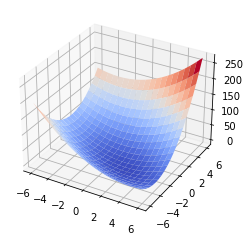

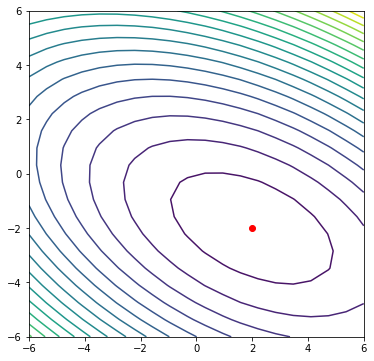

In [4]:
from mpl_toolkits.mplot3d import Axes3D

def dibujaSurf(A,b):
    def f(A,b,x,c):
        return 0.5 * (x.T * A * x) - b.T * x + c

    size_grid = 20
    x1 = np.linspace(-6,6,size_grid)

    xg,yg = np.meshgrid(x1,x1)
    z = np.zeros((size_grid, size_grid))

    for i in range(size_grid):
        for j in range(size_grid):
            x = np.matrix([[xg[i,j]],[yg[i,j]]])
            z[i,j] = f(A,b,x,0)
            
    fig = plt.figure()
    surf = fig.gca(projection='3d')
    surf.plot_surface(xg,yg,z,rstride=1,cstride=1,cmap=plt.cm.coolwarm)
#    fig.show()
    return xg, yg, z

xg,yg,z = dibujaSurf(A,b)

def dibujaContornosf(xg,yg,z,eigen=None, steps=None):
    fig = plt.figure(figsize=(6,6))
    cont = plt.contour(xg,yg,z,20)
#    plt.clabel(cont, inline=1, fontsize=10)
    
    if eigen:
        xv,yv = np.meshgrid([2,2],[-2,-2])
        u = np.array([1,-2])
        v = np.array([2,1])
        vec = plt.quiver(xv,yv,u,v,scale=20)
        plt.plot(2,-2,'ro') # Mínimo y solución 

    if steps:
        steps = np.matrix(steps)
        plt.plot(steps[:,0],steps[:,1],'-')
        plt.plot(-2,-2,'bo') # Inicio
        plt.plot(2,-2,'ro') # Mínimo y solución 


    plt.grid()
#    fig.show()    

dibujaContornosf(xg,yg,z, eigen=True, steps=True)


# Steepest Descent Method

In [ ]:
def steepest(A,b,x,tol,kmax):
    steps = [[x[0,0], x[1,0]]]
    r = b - A * x
    res = np.linalg.norm(r)
    k = 0
    while(res > tol and k < kmax):
        alpha = r.T * r / (r.T * A * r)
        x = x + r * alpha
        steps.append([x[0,0],x[1,0]])
        r = b - A * x
        res = np.linalg.norm(r)
        k += 1
        print(k, res)
    return x, steps

b = np.matrix([[2],[-8]])
x = np.matrix([[-2],[-2]])
tol = 0.001
kmax = 20

x, steps = steepest(A,b,x,tol,kmax)

In [ ]:
dibujaContornosf(xg,yg,z, eigen=False, steps = steps)

In [ ]:
x

In [ ]:
x = np.matrix([[-2.0],[-2.0]])
steps = [(-2.0, -2.0)]
i = 0
imax = 10
eps = 0.01
r = b - A * x
d = r
deltanew = r.T * r
delta0 = deltanew
while i < imax and deltanew > eps**2 * delta0:
    alpha = float(deltanew / float(d.T * (A * d)))
    x = x + alpha * d
    steps.append((x[0, 0], x[1, 0]))
    r = b - A * x
    res = np.linalg.norm(r)
    deltaold = deltanew
    deltanew = r.T * r
    #beta = -float((r.T * A * d) / float(d.T * A * d))
    beta = float(deltanew / float(deltaold))
    d = r + beta * d
    i += 1
    print(i, res)

In [ ]:
dibujaContornosf(xg,yg,z, eigen=False, steps = steps)

In [ ]:
x